# 📊 Phần C – Pandas (1h30) — Hướng dẫn chi tiết (Tiếng Việt)

Mục tiêu:
- Học cách đọc/khám phá dữ liệu CSV bằng Pandas
- Lọc/Chọn cột và hàng
- GroupBy & tính trung bình
- Xuất CSV
- Bài tập: phân tích điểm học sinh

**Hướng dẫn:** Chạy từng ô (cell) theo thứ tự. Phần *Exercises* để em làm trước; phần *SOLUTIONS* chứa lời giải tham khảo.

## 1) Cài đặt & import
Nếu chưa cài pandas, bỏ dấu `#` ở dòng cài đặt rồi chạy.

In [5]:
# !pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', 50)
print('pandas version:', pd.__version__)

pandas version: 2.3.2


### Tạo file mẫu `scores.csv` để thực hành
Nếu em có file thực tế thì có thể bỏ qua ô này.

In [6]:
data = {
    'MaSV': ['S001','S002','S003','S004','S005','S006','S007','S008','S009','S010'],
    'Ten': ['Nguyen Van A','Tran Thi B','Le Van C','Pham Thi D','Hoang E','Vu F','Nguyen G','Tran H','Le I','Pham J'],
    'Lop': ['10A','10A','10B','10B','10A','10C','10C','10B','10A','10C'],
    'Toan': [8.0, 4.5, 6.0, 9.0, 5.5, 3.0, 7.0, 4.0, 6.5, 2.0],
    'Van':  [7.0, 5.0, 6.5, 8.0, 6.0, 4.0, 7.5, 3.5, 5.5, 2.5],
    'Anh':  [6.0, 4.0, 5.0, 9.0, 5.0, 3.0, 6.0, 4.0, 6.0, 1.5]
}
df_sample = pd.DataFrame(data)
os.makedirs('/mnt/data', exist_ok=True)
csv_path = '/mnt/data/scores.csv'
df_sample.to_csv(csv_path, index=False, encoding='utf-8')
print('Created sample CSV at', csv_path)
df_sample.head()

Created sample CSV at /mnt/data/scores.csv


,MaSV,Ten,Lop,Toan,Van,Anh
0,S001,Nguyen Van A,10A,8.0,7.0,6.0
1,S002,Tran Thi B,10A,4.5,5.0,4.0
2,S003,Le Van C,10B,6.0,6.5,5.0
3,S004,Pham Thi D,10B,9.0,8.0,9.0
4,S005,Hoang E,10A,5.5,6.0,5.0


## 2) Đọc CSV & xem nhanh dữ liệu
Sử dụng `pd.read_csv`, `head()`, `info()`, `describe()` để hiểu dataset.

In [7]:
path = '/mnt/data/scores.csv'  # đổi theo file của em nếu cần
df = pd.read_csv(path, encoding='utf-8')
print('Kích thước dữ liệu (rows, cols):', df.shape)
display(df.head())
print('\nThông tin chi tiết:')
df.info()
print('\nMô tả thống kê (với các cột số):')
display(df.describe())

Kích thước dữ liệu (rows, cols): (10, 6)


,MaSV,Ten,Lop,Toan,Van,Anh
0,S001,Nguyen Van A,10A,8.0,7.0,6.0
1,S002,Tran Thi B,10A,4.5,5.0,4.0
2,S003,Le Van C,10B,6.0,6.5,5.0
3,S004,Pham Thi D,10B,9.0,8.0,9.0
4,S005,Hoang E,10A,5.5,6.0,5.0



Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MaSV    10 non-null     object 
 1   Ten     10 non-null     object 
 2   Lop     10 non-null     object 
 3   Toan    10 non-null     float64
 4   Van     10 non-null     float64
 5   Anh     10 non-null     float64
dtypes: float64(3), object(3)
memory usage: 612.0+ bytes

Mô tả thống kê (với các cột số):


,Toan,Van,Anh
count,10.000000,10.000000,10.000000
mean,5.550000,5.550000,4.950000
std,2.204163,1.802005,2.033743
min,2.000000,2.500000,1.500000
25%,4.125000,4.250000,4.000000
50%,5.750000,5.750000,5.000000
75%,6.875000,6.875000,6.000000
max,9.000000,8.000000,9.000000


## 3) Chọn cột & lọc hàng
Ví dụ chọn 1 cột, nhiều cột, lọc theo điều kiện, nhiều điều kiện, dùng `loc`/`iloc`.

In [8]:
# Chọn cột
print('Cột Ten:')
display(df['Ten'].head())

print('\nChọn nhiều cột (Ten, Toan):')
display(df[['Ten','Toan']].head())

# Lọc theo điều kiện (Toán >= 5)
passed_toan = df[df['Toan'] >= 5]
print('\nSinh viên Toán >= 5:')
display(passed_toan)

# Nhiều điều kiện: Toán >=5 và Văn >=5
cond = (df['Toan'] >= 5) & (df['Van'] >= 5)
print('\nToán >=5 và Văn >=5:')
display(df[cond])

# Sử dụng isin
print('\nLọc theo lớp 10A hoặc 10B:')
display(df[df['Lop'].isin(['10A','10B'])])

# loc / iloc
print('\nSử dụng loc để chọn hàng theo label và cột theo tên:')
display(df.loc[0:2, ['MaSV','Ten','Lop']])

print('\nSử dụng iloc (by position):')
display(df.iloc[0:3, 0:4])

Cột Ten:


0    Nguyen Van A
1      Tran Thi B
2        Le Van C
3      Pham Thi D
4         Hoang E
Name: Ten, dtype: object


Chọn nhiều cột (Ten, Toan):


,Ten,Toan
0,Nguyen Van A,8.0
1,Tran Thi B,4.5
2,Le Van C,6.0
3,Pham Thi D,9.0
4,Hoang E,5.5



Sinh viên Toán >= 5:


,MaSV,Ten,Lop,Toan,Van,Anh
0,S001,Nguyen Van A,10A,8.0,7.0,6.0
2,S003,Le Van C,10B,6.0,6.5,5.0
3,S004,Pham Thi D,10B,9.0,8.0,9.0
4,S005,Hoang E,10A,5.5,6.0,5.0
6,S007,Nguyen G,10C,7.0,7.5,6.0
8,S009,Le I,10A,6.5,5.5,6.0



Toán >=5 và Văn >=5:


,MaSV,Ten,Lop,Toan,Van,Anh
0,S001,Nguyen Van A,10A,8.0,7.0,6.0
2,S003,Le Van C,10B,6.0,6.5,5.0
3,S004,Pham Thi D,10B,9.0,8.0,9.0
4,S005,Hoang E,10A,5.5,6.0,5.0
6,S007,Nguyen G,10C,7.0,7.5,6.0
8,S009,Le I,10A,6.5,5.5,6.0



Lọc theo lớp 10A hoặc 10B:


,MaSV,Ten,Lop,Toan,Van,Anh
0,S001,Nguyen Van A,10A,8.0,7.0,6.0
1,S002,Tran Thi B,10A,4.5,5.0,4.0
2,S003,Le Van C,10B,6.0,6.5,5.0
3,S004,Pham Thi D,10B,9.0,8.0,9.0
4,S005,Hoang E,10A,5.5,6.0,5.0
7,S008,Tran H,10B,4.0,3.5,4.0
8,S009,Le I,10A,6.5,5.5,6.0



Sử dụng loc để chọn hàng theo label và cột theo tên:


,MaSV,Ten,Lop
0,S001,Nguyen Van A,10A
1,S002,Tran Thi B,10A
2,S003,Le Van C,10B



Sử dụng iloc (by position):


,MaSV,Ten,Lop,Toan
0,S001,Nguyen Van A,10A,8.0
1,S002,Tran Thi B,10A,4.5
2,S003,Le Van C,10B,6.0


## 4) Thêm cột: tính điểm trung bình (Avg) & trạng thái đỗ/trượt

In [9]:
# Tính điểm trung bình (Toán, Văn, Anh)
df['Avg'] = df[['Toan','Van','Anh']].mean(axis=1)
df['Passed'] = df['Avg'] >= 5.0
display(df[['MaSV','Ten','Lop','Toan','Van','Anh','Avg','Passed']])

,MaSV,Ten,Lop,Toan,Van,Anh,Avg,Passed
0,S001,Nguyen Van A,10A,8.0,7.0,6.0,7.000000,True
1,S002,Tran Thi B,10A,4.5,5.0,4.0,4.500000,False
2,S003,Le Van C,10B,6.0,6.5,5.0,5.833333,True
3,S004,Pham Thi D,10B,9.0,8.0,9.0,8.666667,True
4,S005,Hoang E,10A,5.5,6.0,5.0,5.500000,True
5,S006,Vu F,10C,3.0,4.0,3.0,3.333333,False
6,S007,Nguyen G,10C,7.0,7.5,6.0,6.833333,True
7,S008,Tran H,10B,4.0,3.5,4.0,3.833333,False
8,S009,Le I,10A,6.5,5.5,6.0,6.000000,True
9,S010,Pham J,10C,2.0,2.5,1.5,2.000000,False


## 5) GroupBy & tính toán theo nhóm
Sử dụng `groupby` để tính trung bình theo lớp, đếm số trượt, ...

In [10]:
grouped = df.groupby('Lop').agg(
    Count=('MaSV','size'),
    Avg_Toan=('Toan','mean'),
    Avg_All=('Avg','mean'),
    Num_Failed=('Passed', lambda x: (~x).sum())
).reset_index()
display(grouped)

# Thêm ví dụ: nhiều hàm aggregation
display(df.groupby('Lop')[['Toan','Van','Anh']].agg(['mean','median','min','max']))

,Lop,Count,Avg_Toan,Avg_All,Num_Failed
0,10A,4,6.125000,5.750000,1
1,10B,3,6.333333,6.111111,1
2,10C,3,4.000000,4.055556,2


Toan                        Van                    Anh              \
         mean median  min  max      mean median  min  max  mean median  min   
Lop                                                                           
10A  6.125000    6.0  4.5  8.0  5.875000   5.75  5.0  7.0  5.25    5.5  4.0   
10B  6.333333    6.0  4.0  9.0  6.000000   6.50  3.5  8.0  6.00    5.0  4.0   
10C  4.000000    3.0  2.0  7.0  4.666667   4.00  2.5  7.5  3.50    3.0  1.5   

          
     max  
Lop       
10A  6.0  
10B  9.0  
10C  6.0

## 6) Sắp xếp, reset index, xoá cột

In [11]:
# Sắp xếp theo avg giảm dần
display(df.sort_values('Avg', ascending=False).head())

# Reset index sau khi lọc
df_filtered = df[df['Avg'] >= 5].reset_index(drop=True)
print('Sau khi lọc và reset index:')
display(df_filtered.head())

# Xoá cột tạm (ví dụ)
df_drop = df.drop(columns=['Passed'])
display(df_drop.head())

,MaSV,Ten,Lop,Toan,Van,Anh,Avg,Passed
3,S004,Pham Thi D,10B,9.0,8.0,9.0,8.666667,True
0,S001,Nguyen Van A,10A,8.0,7.0,6.0,7.000000,True
6,S007,Nguyen G,10C,7.0,7.5,6.0,6.833333,True
8,S009,Le I,10A,6.5,5.5,6.0,6.000000,True
2,S003,Le Van C,10B,6.0,6.5,5.0,5.833333,True


Sau khi lọc và reset index:


,MaSV,Ten,Lop,Toan,Van,Anh,Avg,Passed
0,S001,Nguyen Van A,10A,8.0,7.0,6.0,7.000000,True
1,S003,Le Van C,10B,6.0,6.5,5.0,5.833333,True
2,S004,Pham Thi D,10B,9.0,8.0,9.0,8.666667,True
3,S005,Hoang E,10A,5.5,6.0,5.0,5.500000,True
4,S007,Nguyen G,10C,7.0,7.5,6.0,6.833333,True


,MaSV,Ten,Lop,Toan,Van,Anh,Avg
0,S001,Nguyen Van A,10A,8.0,7.0,6.0,7.000000
1,S002,Tran Thi B,10A,4.5,5.0,4.0,4.500000
2,S003,Le Van C,10B,6.0,6.5,5.0,5.833333
3,S004,Pham Thi D,10B,9.0,8.0,9.0,8.666667
4,S005,Hoang E,10A,5.5,6.0,5.0,5.500000


## 7) Xử lý giá trị thiếu (missing values)

In [12]:
df_nan = df.copy()
df_nan.loc[0,'Toan'] = np.nan
print('Số NaN từng cột:')
display(df_nan.isnull().sum())

# Fill NaN bằng mean cột
df_nan['Toan'] = df_nan['Toan'].fillna(df_nan['Toan'].mean())
print('\nSau khi fillna:')
display(df_nan.head())

Số NaN từng cột:


MaSV      0
Ten       0
Lop       0
Toan      1
Van       0
Anh       0
Avg       0
Passed    0
dtype: int64


Sau khi fillna:


,MaSV,Ten,Lop,Toan,Van,Anh,Avg,Passed
0,S001,Nguyen Van A,10A,5.277778,7.0,6.0,7.000000,True
1,S002,Tran Thi B,10A,4.500000,5.0,4.0,4.500000,False
2,S003,Le Van C,10B,6.000000,6.5,5.0,5.833333,True
3,S004,Pham Thi D,10B,9.000000,8.0,9.0,8.666667,True
4,S005,Hoang E,10A,5.500000,6.0,5.0,5.500000,True


## 8) Map, apply và phân loại (pd.cut)

In [13]:
def grade_from_avg(x):
    if x >= 8.0: return 'A'
    if x >= 6.5: return 'B'
    if x >= 5.0: return 'C'
    return 'F'

df['Grade'] = df['Avg'].apply(grade_from_avg)
print('Thêm cột Grade:')
display(df[['Ten','Avg','Grade']])

# Hoặc dùng pd.cut
bins = [0,5,6.5,8,10]
labels = ['F','C','B','A']
df['Grade2'] = pd.cut(df['Avg'], bins=bins, labels=labels, include_lowest=True)
display(df[['Ten','Avg','Grade2']])

Thêm cột Grade:


,Ten,Avg,Grade
0,Nguyen Van A,7.000000,B
1,Tran Thi B,4.500000,F
2,Le Van C,5.833333,C
3,Pham Thi D,8.666667,A
4,Hoang E,5.500000,C
5,Vu F,3.333333,F
6,Nguyen G,6.833333,B
7,Tran H,3.833333,F
8,Le I,6.000000,C
9,Pham J,2.000000,F


,Ten,Avg,Grade2
0,Nguyen Van A,7.000000,B
1,Tran Thi B,4.500000,F
2,Le Van C,5.833333,C
3,Pham Thi D,8.666667,A
4,Hoang E,5.500000,C
5,Vu F,3.333333,F
6,Nguyen G,6.833333,B
7,Tran H,3.833333,F
8,Le I,6.000000,C
9,Pham J,2.000000,F


## 9) Xuất CSV / Excel

In [14]:
failed_path = '/mnt/data/failed_students.csv'
df[df['Passed'] == False].to_csv(failed_path, index=False, encoding='utf-8')
print('Saved failed students to', failed_path)

out_path = '/mnt/data/scores_with_avg.csv'
df.to_csv(out_path, index=False, encoding='utf-8')
print('Saved full data to', out_path)

Saved failed students to /mnt/data/failed_students.csv
Saved full data to /mnt/data/scores_with_avg.csv


## 10) Một vài biểu đồ nhanh (matplotlib)
Lưu ý: dùng matplotlib, mỗi plot 1 ô, không đặt màu cụ thể (để tuân thủ hướng dẫn).

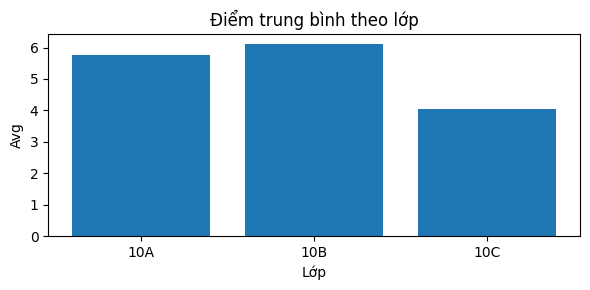

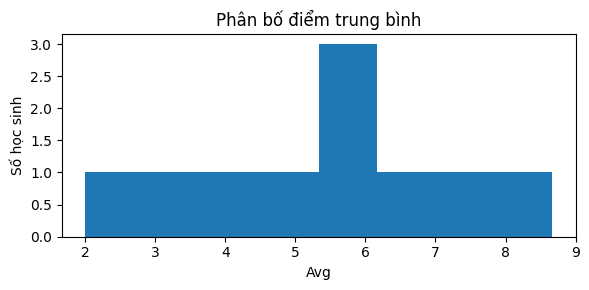

In [15]:
grouped = df.groupby('Lop')['Avg'].mean().reset_index()
plt.figure(figsize=(6,3))
plt.bar(grouped['Lop'], grouped['Avg'])
plt.title('Điểm trung bình theo lớp')
plt.xlabel('Lớp')
plt.ylabel('Avg')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
plt.hist(df['Avg'], bins=8)
plt.title('Phân bố điểm trung bình')
plt.xlabel('Avg')
plt.ylabel('Số học sinh')
plt.tight_layout()
plt.show()

## 11) Bài tập — Em làm trước (không chạy SOLUTIONS)
1. Đọc file `/mnt/data/scores.csv`. In `head()`, `info()`, `describe()`.
2. Thêm cột `Avg` là trung bình Toán-Văn-Anh; in 5 học sinh có `Avg` cao nhất.
3. Liệt kê các học sinh trượt (Avg < 5) và lưu ra `failed_students.csv`.
4. Tính điểm trung bình theo `Lop` và sắp xếp giảm dần.
5. Gán `Grade` theo rule (A: >=8, B:6.5-7.99, C:5-6.49, F:<5) và đếm số học sinh từng grade.

Khi em làm xong những bước trên, chạy ô SOLUTIONS để so sánh.

In [ ]:
# KHU VỰC LÀM BÀI TẬP: Viết code ở ô này để trả lời các câu hỏi trong phần Exercises
df_ex = pd.read_csv('/mnt/data/scores.csv', encoding='utf-8')
display(df_ex.head())

# TODO: 1) head/info/describe
# TODO: 2) tính Avg
# TODO: 3) liệt kê trượt và lưu file
# TODO: 4) trung bình theo lớp
# TODO: 5) gán Grade và đếm

## SOLUTIONS — Lời giải tham khảo
Chạy ô dưới đây để xem lời giải mẫu.

In [16]:
# SOLUTIONS (tham khảo)
df_s = pd.read_csv('/mnt/data/scores.csv', encoding='utf-8')
print('HEAD:'); display(df_s.head())
print('\nINFO:'); df_s.info()
print('\nDESCRIBE:'); display(df_s.describe())

# 2) tính Avg
df_s['Avg'] = df_s[['Toan','Van','Anh']].mean(axis=1)
print('\nTop 5 Avg:'); display(df_s.sort_values('Avg', ascending=False).head())

# 3) liệt kê trượt và lưu file
failed = df_s[df_s['Avg'] < 5].copy()
print('\nDanh sách trượt:'); display(failed)
failed.to_csv('/mnt/data/failed_students_solution.csv', index=False, encoding='utf-8')
print('Saved failed_students_solution.csv')

# 4) trung bình theo lớp và sắp xếp
by_class = df_s.groupby('Lop')['Avg'].agg(['mean','count']).reset_index().sort_values('mean', ascending=False)
print('\nTrung bình theo lớp:'); display(by_class)

# 5) gán Grade và đếm
def grade_rule(x):
    if x >= 8.0: return 'A'
    if x >= 6.5: return 'B'
    if x >= 5.0: return 'C'
    return 'F'
df_s['Grade'] = df_s['Avg'].apply(grade_rule)
print('\nSố học sinh theo Grade:'); display(df_s['Grade'].value_counts())

# Lưu file đã xử lý
df_s.to_csv('/mnt/data/scores_with_analysis.csv', index=False, encoding='utf-8')
print('\nSaved scores_with_analysis.csv')

HEAD:


,MaSV,Ten,Lop,Toan,Van,Anh
0,S001,Nguyen Van A,10A,8.0,7.0,6.0
1,S002,Tran Thi B,10A,4.5,5.0,4.0
2,S003,Le Van C,10B,6.0,6.5,5.0
3,S004,Pham Thi D,10B,9.0,8.0,9.0
4,S005,Hoang E,10A,5.5,6.0,5.0



INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MaSV    10 non-null     object 
 1   Ten     10 non-null     object 
 2   Lop     10 non-null     object 
 3   Toan    10 non-null     float64
 4   Van     10 non-null     float64
 5   Anh     10 non-null     float64
dtypes: float64(3), object(3)
memory usage: 612.0+ bytes

DESCRIBE:


,Toan,Van,Anh
count,10.000000,10.000000,10.000000
mean,5.550000,5.550000,4.950000
std,2.204163,1.802005,2.033743
min,2.000000,2.500000,1.500000
25%,4.125000,4.250000,4.000000
50%,5.750000,5.750000,5.000000
75%,6.875000,6.875000,6.000000
max,9.000000,8.000000,9.000000



Top 5 Avg:


,MaSV,Ten,Lop,Toan,Van,Anh,Avg
3,S004,Pham Thi D,10B,9.0,8.0,9.0,8.666667
0,S001,Nguyen Van A,10A,8.0,7.0,6.0,7.000000
6,S007,Nguyen G,10C,7.0,7.5,6.0,6.833333
8,S009,Le I,10A,6.5,5.5,6.0,6.000000
2,S003,Le Van C,10B,6.0,6.5,5.0,5.833333



Danh sách trượt:


,MaSV,Ten,Lop,Toan,Van,Anh,Avg
1,S002,Tran Thi B,10A,4.5,5.0,4.0,4.500000
5,S006,Vu F,10C,3.0,4.0,3.0,3.333333
7,S008,Tran H,10B,4.0,3.5,4.0,3.833333
9,S010,Pham J,10C,2.0,2.5,1.5,2.000000


Saved failed_students_solution.csv

Trung bình theo lớp:


,Lop,mean,count
1,10B,6.111111,3
0,10A,5.750000,4
2,10C,4.055556,3



Số học sinh theo Grade:


Grade
F    4
C    3
B    2
A    1
Name: count, dtype: int64


Saved scores_with_analysis.csv


## Mẹo & Những lỗi hay gặp
- Khi đọc file CSV, kiểm tra `encoding` (UTF-8 hoặc `latin1`) nếu gặp lỗi hiển thị tiếng Việt.
- Dùng `reset_index(drop=True)` sau khi lọc để có index gọn.
- Khi tính aggregation, chú ý `NaN` sẽ làm kết quả `mean` khác; xử lý `NaN` bằng `fillna` nếu cần.
- Dùng `inplace=False` mặc định; tránh thay đổi dataframe gốc nếu chưa chắc.